In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/Hospital+Patient+Records.xlsx")

df["DURATION_MINUTES"] = (df["STOP"] - df["START"]).dt.total_seconds() / 60


In [5]:
df["DURATION_MINUTES"].describe()


,DURATION_MINUTES
count,47701.000000
mean,33.263252
std,115.395010
min,0.000000
25%,15.000000
50%,16.533333
75%,29.583333
max,23040.000000


In [9]:
df = df[df["DURATION_MINUTES"] > 0]

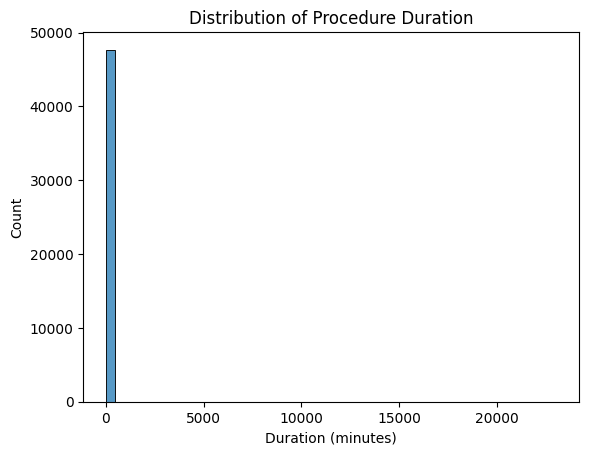

In [14]:
plt.figure()
sns.histplot(df["DURATION_MINUTES"], bins=50)
plt.xlabel("Duration (minutes)")
plt.title("Distribution of Procedure Duration")
plt.show()


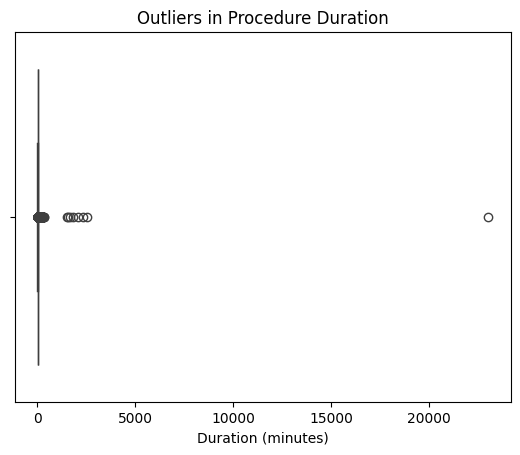

In [15]:
plt.figure()
sns.boxplot(x=df["DURATION_MINUTES"])
plt.xlabel("Duration (minutes)")
plt.title("Outliers in Procedure Duration")
plt.show()


In [16]:
upper_limit = df["DURATION_MINUTES"].quantile(0.99)
df["DURATION_MINUTES_CAPPED"] = df["DURATION_MINUTES"].clip(upper=upper_limit)


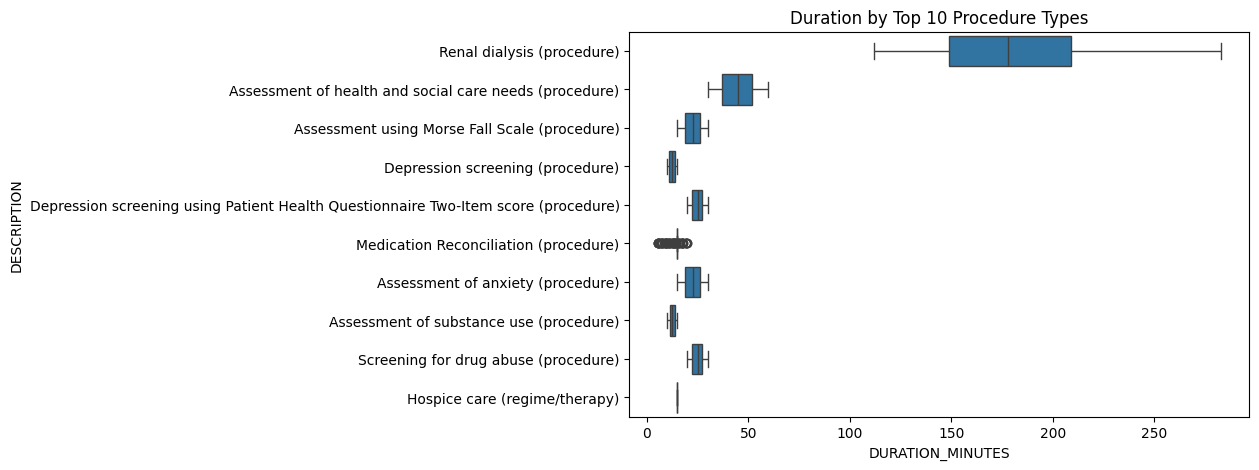

In [17]:
top_procedures = df["DESCRIPTION"].value_counts().head(10).index

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df[df["DESCRIPTION"].isin(top_procedures)],
    y="DESCRIPTION",
    x="DURATION_MINUTES"
)
plt.title("Duration by Top 10 Procedure Types")
plt.show()


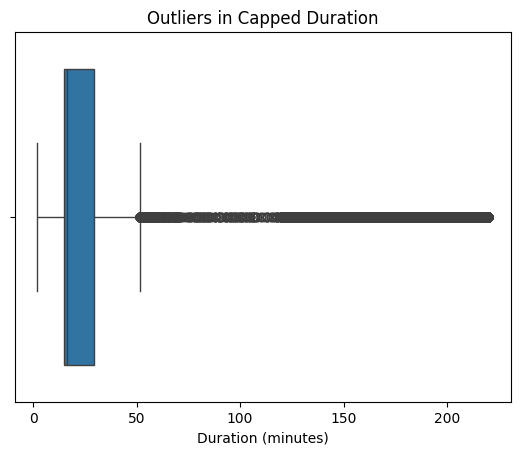

In [59]:
plt.figure()
sns.boxplot(x=df["DURATION_CAPPED"])
plt.xlabel("Duration (minutes)")
plt.title("Outliers in Capped Duration")
plt.show()


In [56]:
cap = df["DURATION_MINUTES"].quantile(0.99)

df["DURATION_CAPPED"] = df["DURATION_MINUTES"].clip(upper=cap)


In [58]:
df.sort_values("DURATION_MINUTES", ascending=False).head(5)[
    ["START", "STOP", "DESCRIPTION", "DURATION_MINUTES","DURATION_CAPPED"]
]


,START,STOP,DESCRIPTION,DURATION_MINUTES,DURATION_CAPPED
25825,2017-01-11 10:03:19,2017-01-27 10:03:19,Admission to long stay hospital,23040.0,220.0
9720,2013-10-22 04:32:09,2013-10-23 22:32:09,Human epidermal growth factor receptor 2 gene ...,2520.0,220.0
13905,2014-06-04 06:33:43,2014-06-05 21:33:43,Human epidermal growth factor receptor 2 gene ...,2340.0,220.0
32350,2018-07-19 04:25:40,2018-07-20 15:25:40,Human epidermal growth factor receptor 2 gene ...,2100.0,220.0
29167,2017-09-30 17:52:26,2017-10-01 23:52:26,Human epidermal growth factor receptor 2 gene ...,1800.0,220.0
